# Check clusterings across different methods.

This notebook is designed to load the different methods' clustering schemes. Combined with the information gathered from (1) multiple alignment-based hamming distances and (2) mash distances, we look at the databases to determine a "hard" group of phylogroup A strains to include in our semisynthetic benchmark.

In [1]:
from pathlib import Path
import pandas as pd

import json

# Reference genome metadata

In [2]:
index_df = pd.read_csv("/mnt/e/ecoli_db/ref_genomes/index.tsv", sep='\t')

In [2]:
def load_poppunk_cluster() -> pd.DataFrame:
    # p = Path("/mnt/e/semisynthetic_data/poppunk/threshold/threshold_clusters.csv")
    p = Path("/mnt/e/infant_nt/database/mgems/ref_dir/Ecoli/poppunk/threshold/threshold_clusters.csv")
    def fix_accession(t_id):
        tokens = t_id.split('_')
        return '{}.{}'.format('_'.join(tokens[:-1]), tokens[2])
    
    df = pd.read_csv(p)
    df['Accession'] = df['Taxon'].map(fix_accession)
    return df.drop(columns=['Taxon'])


def load_chronostrain_cluster() -> pd.DataFrame:
    df_entries = []
    chronostrain_cluster = Path("/mnt/e/ecoli_db/chronostrain_files/ecoli.clusters.txt")
    with open(chronostrain_cluster, "rt") as f:
        for line in f:
            if line.startswith("#"):
                continue
            tokens = line.strip().split("\t")
            rep_id = tokens[0]
            members = tokens[1].split(",")
            for member in members:
                df_entries.append({
                    'Accession': member,
                    'Cluster': rep_id
                })
    return pd.DataFrame(df_entries)


def load_strainge_cluster() -> pd.DataFrame:
    p = Path("/mnt/e/semisynthetic_data/databases/strainge/clusters.tsv")
    df_entries = []
    with open(p, "rt") as f:
        for line in f:
            clust = line.strip().split('\t')
            rep = clust[0]
            for member in clust:
                df_entries.append({
                    'Accession': member,
                    'Cluster': rep
                })
    return pd.DataFrame(df_entries)


def parse_phylogroups():
    phylogroup_path = Path("/mnt/e/ecoli_db/phylogeny/ClermonTyping/umb_phylogroups_complete.txt")
    df_entries = []
    with open(phylogroup_path, 'r') as f:
        for line in f:
            tokens = line.strip().split('\t')
            accession = Path(tokens[0]).with_suffix('').with_suffix('').name
            phylogroup = tokens[4]
            df_entries.append({'Accession': accession, 'Phylogroup': phylogroup})
    return pd.DataFrame(df_entries)

NameError: name 'pd' is not defined

In [1]:
print("CHRONOSTRAIN")
_df = load_chronostrain_cluster()
print("# clusters = {}".format(
    len(pd.unique(_df['Cluster']))
))

_df = _df.merge(parse_phylogroups(), left_on='Cluster', right_on='Accession', suffixes=['', '_y']).drop(columns=['Accession_y'])
print("# phylogroup A clusters = {}".format(
    len(pd.unique(
        _df.loc[_df['Phylogroup'] == 'A', 'Cluster']
    ))
))
display(_df)
del _df

CHRONOSTRAIN


NameError: name 'load_chronostrain_cluster' is not defined

In [19]:
print("POPPUNK")
_df = load_poppunk_cluster()
print("# clusters = {}".format(
    len(pd.unique(_df['Cluster']))
))

_df = _df.merge(parse_phylogroups(), on='Accession')
_df['PhyloA'] = _df['Phylogroup'].map(lambda p: p == 'A')

phylo_A_counts = _df.groupby("Cluster")['PhyloA'].sum()
cluster_sz = _df.groupby("Cluster")['Accession'].count()
phylo_A_ratio = phylo_A_counts / cluster_sz

num_A_clusters = phylo_A_ratio.loc[phylo_A_ratio > 0.5].shape[0]
print("# phylo A clusters = {}".format(num_A_clusters))

display(_df)
del _df

POPPUNK
# clusters = 2468
# phylo A clusters = 342


,Cluster,Accession,Phylogroup,PhyloA
0,1,NZ_CP028662.1,E,False
1,1,NZ_CP028629.1,E,False
2,1,NZ_CP038380.1,E,False
3,1,NZ_CP038372.1,E,False
4,1,NZ_CP028700.1,E,False
...,...,...,...,...
2141,2453,NC_011415.1,B1,False
2142,2457,NC_010498.1,F,False
2143,2460,NC_009801.1,B1,False
2144,2462,NC_008563.1,B2,False


In [20]:
print("STRAINGST")
_df = load_strainge_cluster()
print("# clusters = {}".format(
    len(pd.unique(_df['Cluster']))
))

_df = _df.merge(parse_phylogroups(), left_on='Cluster', right_on='Accession', suffixes=['', '_y']).drop(columns=['Accession_y'])
print("# phylogroup A clusters = {}".format(
    len(pd.unique(
        _df.loc[_df['Phylogroup'] == 'A', 'Cluster']
    ))
))
display(_df)
del _df

STRAINGST
# clusters = 1119
# phylogroup A clusters = 340


,Accession,Cluster,Phylogroup
0,NZ_CP040570.1,NZ_CP040570.1,E
1,NZ_CP028652.1,NZ_CP040570.1,E
2,NZ_CP062755.1,NZ_CP040570.1,E
3,NZ_CP062742.1,NZ_CP040570.1,E
4,NZ_CP062749.1,NZ_CP040570.1,E
...,...,...,...
2141,NZ_LS992171.1,NZ_LS992171.1,A
2142,NZ_LT594504.1,NZ_LT594504.1,C
2143,NZ_LT795502.1,NZ_LT795502.1,E
2144,NZ_LT883142.1,NZ_LT883142.1,A


In [60]:
parse_phylogroups()

,Accession,Phylogroup
0,NZ_CP030778.2,albertii
1,NZ_CP034162.1,albertii
2,NZ_CP030781.1,albertii
3,NZ_CP025317.1,albertii
4,NZ_CP034212.1,albertii
...,...,...
2141,NZ_CP038372.1,E
2142,NZ_CP038369.1,E
2143,NZ_CP024263.1,E
2144,NZ_CP038366.1,E


In [68]:
# Merge dataframes.
cluster_df = index_df[
    ['Accession', 'Strain', 'Genus', 'Species']
].merge(
    load_chronostrain_cluster(),
    on='Accession', how='inner'
).rename(columns={'Cluster': 'ClusterChronostrain'}).merge(
    load_poppunk_cluster(),
    on='Accession', how='inner'
).rename(columns={'Cluster': 'ClusterPopPUNK'}).merge(
    parse_phylogroups(), on='Accession'
).fillna('?')

display(cluster_df)

,Accession,Strain,Genus,Species,ClusterChronostrain,ClusterPopPUNK,Phylogroup
0,NZ_CP030778.2,05-3106,Escherichia,albertii,NZ_CP030778.2,2056,albertii
1,NZ_CP034162.1,06-3542,Escherichia,albertii,NZ_CP034162.1,1970,albertii
2,NZ_CP030781.1,07-3866,Escherichia,albertii,NZ_CP030781.1,2055,albertii
3,NZ_CP025317.1,1551-2,Escherichia,albertii,NZ_CP025317.1,2299,albertii
4,NZ_CP034212.1,2010C-3449,Escherichia,albertii,NZ_CP034212.1,1968,albertii
...,...,...,...,...,...,...,...
2136,NZ_CP093239.1,W49-2,Escherichia,marmotae,NZ_CP093239.1,604,cladeV
2137,NZ_CP040443.1,E4742,Escherichia,sp.,NZ_CP040443.1,1850,Unknown
2138,NZ_CP051430.1,SCLE84,Escherichia,sp.,NZ_CP051430.1,1557,B1
2139,NZ_CP079924.1,TC-EC600-tetX4,Escherichia,sp.,NZ_CP025268.1,2,A


# Distance calculations

In [63]:
# Load distances

from Bio import SeqIO
import itertools
from tqdm.notebook import tqdm
import numpy as np



_acgt_to_z4 = {
    "A": 0,
    "a": 0,
    "C": 1,
    "c": 1,
    "G": 2,
    "g": 2,
    "T": 3,
    "t": 3,
    "N": 4,  # Special character (unknown base)
    "n": 4,
    chr(4): 4,  # Fallback error char for ssw-align
    "-": 5   # Special character (gap)
}
def map_nucleotide_to_z4(nucleotide: str) -> int:
    try:
        return _acgt_to_z4[nucleotide]
    except KeyError:
        raise UnknownNucleotideError(nucleotide) from None

def nucleotides_to_z4(nucleotides: str) -> np.ndarray:
    """
    Convert an input nucleotide string (A/C/G/T) to a torch tensor of elements of integers mod 4 (0/1/2/3).
    :param nucleotides:
    :return:
    """
    return np.fromiter((map_nucleotide_to_z4(x) for x in nucleotides), np.ubyte)




def hamming_dist(s1: np.ndarray, s2: np.ndarray) -> int:
    return np.sum(~np.equal(s1, s2))

def load_marker_dist():
    p = Path("/mnt/e/ecoli_db/_ALIGN_ecoli/multiple_alignment.fasta")
    acc_to_seq = {}
    for record in SeqIO.parse(p, "fasta"):
        acc_to_seq[record.id] = nucleotides_to_z4(record.seq)

    df_entries = []
    n = len(acc_to_seq)
    for x, y in tqdm(itertools.combinations(acc_to_seq, 2), total=int(n*(n-1) / 2)):
        dist = hamming_dist(acc_to_seq[x], acc_to_seq[y])
        if x > y:
            _z = x
            x = y
            y = _z
        df_entries.append({
            'Acc1': x, 'Acc2': y, 'Dist': dist
        })
    return pd.DataFrame(df_entries)

In [39]:
marker_dist = load_marker_dist()

  0%|          | 0/14566503 [00:00<?, ?it/s]

In [31]:
# Compute and load mash distances

import subprocess


def invoke_mash_sketch(input_path: Path, out_prefix: Path) -> Path:
    expected_out_path = out_prefix.parent / f'{out_prefix.name}.msh'
    if not expected_out_path.exists():
        subprocess.run(
            [
                'mash', 'sketch',
                '-l', 
                str(input_path),
                '-o',
                str(out_prefix)
            ], 
            capture_output=False,
            stderr=subprocess.PIPE
        )
    return expected_out_path


def invoke_mash_dist(compound_sketch: Path) -> float:
    completed = subprocess.run(['mash', 'dist', str(compound_sketch), str(compound_sketch)], capture_output=True)
    completed.check_returncode()

    answer = completed.stdout.decode('utf-8')
    ref_id, query_id, mash_dist, p_val, matching_hashes = answer.split('\t')
    return float(mash_dist)


def prepare_mash_input(index_df: pd.DataFrame, work_dir: Path) -> pd.DataFrame:
    work_dir.mkdir(exist_ok=True, parents=True)

    mash_input = work_dir / 'mash_input.txt'
    with open(mash_input, 'w') as f:
        for _, row in index_df.iterrows():
            strain_id = row['Accession']
            seq_path = row['SeqPath']
            print(seq_path, file=f)


def load_mash_dist(dist_tsv: Path, index_df: pd.DataFrame) -> pd.DataFrame:
    df_entries = []
    suffix = '.chrom.fna'
    n = index_df.shape[0]
    with open(dist_tsv, 'rt') as f:
        for line in tqdm(f, total=int(n*n)):
            tokens = line.strip().split('\t')
            x = Path(tokens[0]).name[:-len(suffix)]
            y = Path(tokens[1]).name[:-len(suffix)]
            if x >= y:
                continue
            dist = float(tokens[2])
            df_entries.append({
                'Acc1': x, 'Acc2': y, 'Dist': dist
            })
    return pd.DataFrame(df_entries)

In [32]:
### Uncomment all to run the entire mash pipeline

# work_dir = Path('./__mash_tmp')
# prepare_mash_input(index_df, work_dir)
# !mash sketch -l __mash_tmp/mash_input.txt -o __mash_tmp/reference
# !mash dist __mash_tmp/reference.msh __mash_tmp/reference.msh > __mash_tmp/distances.tab
mash_dist = load_mash_dist(Path('./__mash_tmp/distances.tab'), index_df)

  0%|          | 0/29224836 [00:00<?, ?it/s]

In [64]:
ecoli_marker_dist = marker_dist.merge(
    index_df.loc[index_df['Species'] == 'coli', ['Accession']],
    left_on='Acc1', right_on='Accession', how='inner'
).drop(columns=['Accession']).merge(
    index_df.loc[index_df['Species'] == 'coli', ['Accession']],
    left_on='Acc2', right_on='Accession', how='inner'
).drop(columns=['Accession'])

ecoli_mash_dist = mash_dist.merge(
    index_df.loc[index_df['Species'] == 'coli', ['Accession']],
    left_on='Acc1', right_on='Accession', how='inner'
).drop(columns=['Accession']).merge(
    index_df.loc[index_df['Species'] == 'coli', ['Accession']],
    left_on='Acc2', right_on='Accession', how='inner'
).drop(columns=['Accession'])

In [67]:
merged_ecoli_dists

,Acc1,Acc2,Dist_marker,Dist_mash,CombinedDist
0,NZ_CP024056.1,NZ_CP024618.1,3,0.000337,0.007829
1,NZ_CP023673.1,NZ_CP024618.1,19,0.001919,0.044634
2,NZ_AP023235.1,NZ_CP024618.1,17560,0.016668,0.700582
3,NZ_AP023224.1,NZ_CP024618.1,13889,0.015724,0.612760
4,NZ_CP013112.1,NZ_CP024618.1,13389,0.015081,0.588921
...,...,...,...,...,...
2116648,NC_007779.1,NC_009800.1,39813,0.010314,0.954252
2116649,NC_000913.3,NC_009800.1,39813,0.010356,0.955226
2116650,NC_002695.2,NC_004431.1,17303,0.034248,1.101672
2116651,NC_000913.3,NC_004431.1,20641,0.031275,1.093119


In [69]:
merged_ecoli_dists = ecoli_marker_dist.merge(ecoli_mash_dist, on=['Acc1', 'Acc2'], suffixes=['_marker', '_mash'])

merged_ecoli_dists['CombinedDist'] = (
    merged_ecoli_dists['Dist_marker'] / merged_ecoli_dists['Dist_marker'].max()
    +
    merged_ecoli_dists['Dist_mash'] / merged_ecoli_dists['Dist_mash'].max()
)


_merged = merged_ecoli_dists.merge(
    cluster_df.loc[cluster_df['Species'] == 'coli', ['Accession', 'Strain', 'ClusterChronostrain', 'ClusterPopPUNK', 'Phylogroup']],  # attach cluster annotation to acc1
    left_on='Acc1', right_on='Accession'
).drop(columns=['Accession']).merge(
    cluster_df.loc[cluster_df['Species'] == 'coli', ['Accession', 'Strain', 'ClusterChronostrain', 'ClusterPopPUNK', 'Phylogroup']],  # attach cluster annotation to acc2
    left_on='Acc2', right_on='Accession',
    suffixes=['1', '2']
).drop(columns=['Accession']).merge(
    cluster_df.groupby('ClusterPopPUNK')['Accession'].count().rename('PopPUNKCount').to_frame().reset_index(),  # attach poppunk cluster size to acc1
    left_on='ClusterPopPUNK1', right_on='ClusterPopPUNK'
).drop(columns=['ClusterPopPUNK']).merge(
    cluster_df.groupby('ClusterPopPUNK')['Accession'].count().rename('PopPUNKCount').to_frame().reset_index(),  # attach poppunk cluster size to acc2
    left_on='ClusterPopPUNK2', right_on='ClusterPopPUNK',
    suffixes=['1', '2']
).drop(columns=['ClusterPopPUNK']).merge(
    cluster_df.groupby('ClusterChronostrain')['Accession'].count().rename('ChronostrainCount').to_frame().reset_index(),  # attach chronostrain cluster size to acc1
    left_on='ClusterChronostrain1', right_on='ClusterChronostrain'
).drop(columns=['ClusterChronostrain']).merge(
    cluster_df.groupby('ClusterChronostrain')['Accession'].count().rename('ChronostrainCount').to_frame().reset_index(),  # attach chronostrain cluster size to acc2
    left_on='ClusterChronostrain2', right_on='ClusterChronostrain',
    suffixes=['1', '2']
).drop(columns=['ClusterChronostrain'])
# .merge(
#     cluster_df.groupby('ClusterStrainGE')['Accession'].count().rename('StrainGECount').to_frame().reset_index(),  # attach strainGE cluster size to acc1
#     left_on='ClusterStrainGE1', right_on='ClusterStrainGE'
# ).drop(columns=['ClusterStrainGE']).merge(
#     cluster_df.groupby('ClusterStrainGE')['Accession'].count().rename('StrainGECount').to_frame().reset_index(),  # attach strainGE cluster size to acc2
#     left_on='ClusterStrainGE2', right_on='ClusterStrainGE',
#     suffixes=['1', '2']
# ).drop(columns=['ClusterStrainGE'])

display(_merged)

,Acc1,Acc2,Dist_marker,Dist_mash,CombinedDist,Strain1,ClusterChronostrain1,ClusterPopPUNK1,Phylogroup1,Strain2,ClusterChronostrain2,ClusterPopPUNK2,Phylogroup2,PopPUNKCount1,PopPUNKCount2,ChronostrainCount1,ChronostrainCount2
0,NZ_CP024056.1,NZ_CP024618.1,3,0.000337,0.007829,SMN197SH3,NZ_CP024056.1,372,A,SMN152SH1,NZ_CP024056.1,372,A,2,2,4,4
1,NZ_CP023673.1,NZ_CP024618.1,19,0.001919,0.044634,SMN013SH2,NZ_CP024056.1,2353,A,SMN152SH1,NZ_CP024056.1,372,A,1,2,4,4
2,NZ_CP023673.1,NZ_CP024056.1,16,0.001548,0.036021,SMN013SH2,NZ_CP024056.1,2353,A,SMN197SH3,NZ_CP024056.1,372,A,1,2,4,4
3,NZ_CP024056.1,NZ_CP027591.1,1,0.000508,0.011742,SMN197SH3,NZ_CP024056.1,372,A,2014C-3011,NZ_CP024056.1,2175,A,2,1,4,4
4,NZ_CP024618.1,NZ_CP027591.1,4,0.000706,0.016362,SMN152SH1,NZ_CP024056.1,372,A,2014C-3011,NZ_CP024056.1,2175,A,2,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116648,NC_002695.2,NC_009801.1,23687,0.022205,0.938584,Sakai_substr._RIMD_0509952,NZ_CP015846.1,1,E,E24377A,NC_009801.1,2904,B1,192,1,59,1
2116649,NC_007946.1,NC_009801.1,14268,0.033043,1.019264,UTI89,NZ_CP064825.1,43,B2,E24377A,NC_009801.1,2904,B1,10,1,7,1
2116650,NC_000913.3,NC_009801.1,19771,0.014923,0.700086,K-12_substr._MG1655,NZ_CP012127.1,2,A,E24377A,NC_009801.1,2904,B1,173,1,31,1
2116651,NC_007779.1,NC_009801.1,19771,0.014923,0.700086,K-12_substr._W3110,NC_007779.1,2,A,E24377A,NC_009801.1,2904,B1,173,1,1,1


In [71]:
# ====== Apply search criteria.
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
_merged.loc[
    (_merged['ClusterChronostrain1'] != _merged['ClusterChronostrain2'])  # distinct clusters on StrainGE
    & (_merged['ClusterPopPUNK1'] != _merged['ClusterPopPUNK2'])  # distinct clusters on chronostrain
    # & (_merged['ClusterStrainGE1'] != _merged['ClusterStrainGE2'])  # distinct clusters on StrainGE
    # & (_merged['PopPUNKCount1'] > 1) & (_merged['PopPUNKCount2'] > 1)  # Cluster size larger than 1
    # & (_merged['ChronostrainCount1'] > 1) & (_merged['ChronostrainCount2'] > 1)  # Cluster size larger than 1
    # & (_merged['StrainGECount1'] > 1) & (_merged['StrainGECount2'] > 1)  # Cluster size larger than 1
    & (_merged['Acc1'] == _merged['ClusterChronostrain1'])
    & (_merged['Acc2'] == _merged['ClusterChronostrain2'])
    & (_merged['Dist_marker'] < 683.000000)
    & (_merged['Dist_mash'] < 0.006804 	)
    & (_merged['Phylogroup1'] == 'A') & (_merged['Phylogroup2'] == 'A')
].sort_values('CombinedDist').head(70)

,Acc1,Acc2,Dist_marker,Dist_mash,CombinedDist,Strain1,ClusterChronostrain1,ClusterPopPUNK1,Phylogroup1,Strain2,ClusterChronostrain2,ClusterPopPUNK2,Phylogroup2,PopPUNKCount1,PopPUNKCount2,ChronostrainCount1,ChronostrainCount2
345861,NZ_CP017844.1,NZ_CP024260.1,1,0.000096,0.002223,FMU073332,NZ_CP017844.1,2530,A,F5656C1,NZ_CP024260.1,2335,A,1,1,2,1
1805098,NZ_CP081007.1,NZ_CP093221.1,59,0.000288,0.007715,XL1-Blue,NZ_CP081007.1,2,A,ER2683,NZ_CP093221.1,605,A,173,1,2,1
2102930,NZ_CP021532.1,NZ_CP021736.1,0,0.000483,0.011157,AR_0149,NZ_CP021532.1,382,A,AR_0150,NZ_CP021736.1,381,A,2,2,1,1
2024710,NZ_CP038180.1,NZ_CP071436.1,1,0.000508,0.011742,2_HS-C,NZ_CP038180.1,1896,A,EcPNK006,NZ_CP071436.1,958,A,1,1,1,1
345930,NZ_CP022912.1,NZ_CP024260.1,7,0.000533,0.012418,2011EL-1370-2,NZ_CP022912.1,191,A,F5656C1,NZ_CP024260.1,2335,A,3,1,1,1
1805092,NZ_CP053603.1,NZ_CP093221.1,8,0.000557,0.013004,Dam_Dcm,NZ_CP053603.1,2,A,ER2683,NZ_CP093221.1,605,A,173,1,1,1
292700,NZ_CP024260.1,NZ_LR882973.1,3,0.000607,0.014054,F5656C1,NZ_CP024260.1,2335,A,L2_E1649,NZ_LR882973.1,191,A,1,3,1,1
1429492,NZ_CP093221.1,NZ_LM995446.1,12,0.000607,0.014216,ER2683,NZ_CP093221.1,605,A,K-12_substr._RV308,NZ_LM995446.1,2,A,1,173,1,1
2100256,NZ_CP010143.1,NZ_CP010152.1,0,0.000631,0.014571,D4,NZ_CP010143.1,2681,A,D9,NZ_CP010152.1,2677,A,1,1,1,1
2047697,NZ_CP017844.1,NZ_CP022912.1,6,0.000631,0.014679,FMU073332,NZ_CP017844.1,2530,A,2011EL-1370-2,NZ_CP022912.1,191,A,1,3,2,1


In [272]:
_merged.loc[(_merged['Phylogroup1'] == 'A') & (_merged['Phylogroup2'] == 'A'), ['Dist_mash', 'Dist_marker']].quantile(.25)

Dist_mash        0.006804
Dist_marker    683.000000
Name: 0.25, dtype: float64

In [89]:
phylo_df = parse_phylogroups()
phylo_df.loc[phylo_df['Phylogroup'] == 'A'].sample(3)['Accession']

1869    NZ_CP068279.1
1549    NZ_CP051001.1
1311    NZ_CP035882.1
Name: Accession, dtype: object

In [90]:
to_check = ['NZ_CP068279.1', 'NZ_CP051001.1', 'NZ_CP035882.1']
display(cluster_df.loc[
    cluster_df['Accession'].isin(to_check)
])

for x, y in itertools.combinations(to_check, 2):
    if x < y:
        display(_merged.loc[
            (_merged['Acc1'] == x) & (_merged['Acc2'] == y)
        ])
    else:
        display(_merged.loc[
            (_merged['Acc1'] == y) & (_merged['Acc2'] == x)
        ])

,Accession,Strain,Genus,Species,ClusterChronostrain,ClusterPopPUNK,Phylogroup
402,NZ_CP051001.1,98-3133,Escherichia,coli,NZ_CP051001.1,1576,A
719,NZ_CP068279.1,CY708,Escherichia,coli,NZ_CP068279.1,2,A
2006,NZ_CP035882.1,WS0115A,Escherichia,coli,NZ_CP035882.1,1919,A


,Acc1,Acc2,Dist_marker,Dist_mash,CombinedDist,Strain1,ClusterChronostrain1,ClusterPopPUNK1,Phylogroup1,Strain2,ClusterChronostrain2,ClusterPopPUNK2,Phylogroup2,PopPUNKCount1,PopPUNKCount2,ChronostrainCount1,ChronostrainCount2
1464730,NZ_CP051001.1,NZ_CP068279.1,32424,0.005909,0.719659,98-3133,NZ_CP051001.1,1576,A,CY708,NZ_CP068279.1,2,A,1,173,1,1


,Acc1,Acc2,Dist_marker,Dist_mash,CombinedDist,Strain1,ClusterChronostrain1,ClusterPopPUNK1,Phylogroup1,Strain2,ClusterChronostrain2,ClusterPopPUNK2,Phylogroup2,PopPUNKCount1,PopPUNKCount2,ChronostrainCount1,ChronostrainCount2
1464482,NZ_CP035882.1,NZ_CP068279.1,29834,0.01023,0.772791,WS0115A,NZ_CP035882.1,1919,A,CY708,NZ_CP068279.1,2,A,1,173,1,1


,Acc1,Acc2,Dist_marker,Dist_mash,CombinedDist,Strain1,ClusterChronostrain1,ClusterPopPUNK1,Phylogroup1,Strain2,ClusterChronostrain2,ClusterPopPUNK2,Phylogroup2,PopPUNKCount1,PopPUNKCount2,ChronostrainCount1,ChronostrainCount2
1892385,NZ_CP035882.1,NZ_CP051001.1,13954,0.010441,0.491992,WS0115A,NZ_CP035882.1,1919,A,98-3133,NZ_CP051001.1,1576,A,1,1,1,1


In [115]:
cluster_df = index_df[
    ['Accession', 'Strain', 'Genus', 'Species']
].merge(
    load_chronostrain_cluster(),
    on='Accession', how='inner'
).rename(columns={'Cluster': 'ClusterChronostrain'}).merge(
    load_poppunk_cluster(),
    on='Accession', how='inner'
).rename(columns={'Cluster': 'ClusterPopPUNK'}).merge(
    parse_phylogroups(), on='Accession'
).fillna('?')

cluster_df.loc[cluster_df['Phylogroup'] == 'A'].sample(3)

,Accession,Strain,Genus,Species,ClusterChronostrain,ClusterPopPUNK,Phylogroup
1155,NZ_CP010169.1,H5,Escherichia,coli,NZ_CP010169.1,3281,A
1689,NZ_CP010226.1,S1,Escherichia,coli,NZ_CP010226.1,3266,A
822,NZ_CP084900.1,EC20,Escherichia,coli,NZ_CP084900.1,612,A


In [107]:
chronostrain_df = load_chronostrain_cluster()
_count_df = chronostrain_df.groupby("Cluster")['Accession'].count().rename("Count").to_frame().reset_index()
_count_df.groupby("Count").count()

,Cluster
Count,
1,3136
2,275
3,93
4,41
5,22
6,21
7,8
8,7
9,7


In [287]:
to_check = ['NZ_CP092452.1', 'NZ_CP024859.1']
display(cluster_df.loc[
    cluster_df['Accession'].isin(to_check)
])

for x, y in itertools.combinations(to_check, 2):
    if x < y:
        display(_merged.loc[
            (_merged['Acc1'] == x) & (_merged['Acc2'] == y)
        ])
    else:
        display(_merged.loc[
            (_merged['Acc1'] == y) & (_merged['Acc2'] == x)
        ])

,Accession,Strain,Genus,Species,ClusterChronostrain,ClusterPopPUNK,ClusterStrainGE,Phylogroup
506,NZ_CP024859.1,AR_0014,Escherichia,coli,NZ_CP024859.1,3,NZ_CP029115.1,A
1894,NZ_CP092452.1,TKEC21-59,Escherichia,coli,NZ_CP092452.1,254,NZ_CP092449.1,A


,Acc1,Acc2,Dist_marker,Dist_mash,CombinedDist,Strain1,ClusterChronostrain1,ClusterPopPUNK1,ClusterStrainGE1,Phylogroup1,Strain2,ClusterChronostrain2,ClusterPopPUNK2,ClusterStrainGE2,Phylogroup2,PopPUNKCount1,PopPUNKCount2,ChronostrainCount1,ChronostrainCount2,StrainGECount1,StrainGECount2
1014646,NZ_CP024859.1,NZ_CP092452.1,659,0.011666,0.296273,AR_0014,NZ_CP024859.1,3,NZ_CP029115.1,A,TKEC21-59,NZ_CP092452.1,254,NZ_CP092449.1,A,333,2,95,2,47,2


In [201]:
cluster_df.groupby('ClusterPopPUNK')['Accession'].count().rename('PopPUNKCount').to_frame().reset_index()

,ClusterPopPUNK,PopPUNKCount
0,1,406
1,2,372
2,3,333
3,4,234
4,5,173
...,...,...
1409,1411,1
1410,1412,1
1411,1413,1
1412,1414,1


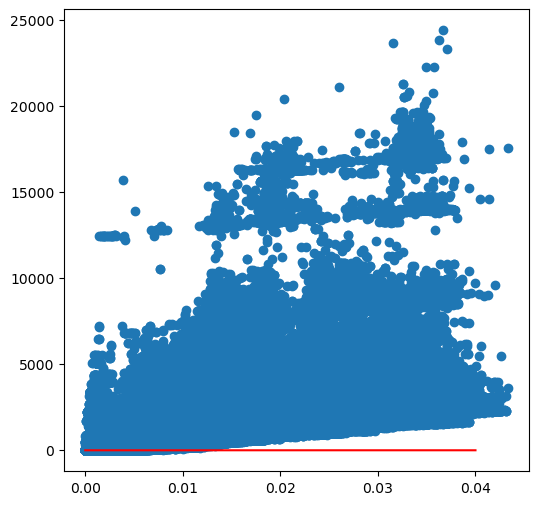

In [111]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(merged_ecoli_dists['Dist_mash'], merged_ecoli_dists['Dist_marker'])
ax.plot([0, 0.04,], [0, 0.04], color='red')